# Linear Approximation SARSA

This is the implementation of Linear SARSA. Instead of holding the Q values in a table, we approximate them with a linear -parameterized- function. At each iteration we update the parameter with respect to the gradient of the expected return after an action is selected. The action is selected as $argmax (w^Tx)$ then the gradient is calculated with respect to the selected action. You can edit the ```approx``` function the way you like as long as it outputs a vector of size 2.

In [1]:
import autograd.numpy as np
import gym
import matplotlib.pyplot as plt
from autograd import grad, elementwise_grad
import random
from IPython import display

In [138]:
# Linear approximation function to expected returns
def approx(weights, state, action):
    return np.dot(state, weights)[action]

def policy(env, weights, state, epsilon):
    actions = [0, 1]
    if np.random.rand() < epsilon:
        return random.choice(actions)
    qs = []
    for action in actions:
        qs.append(approx(weights, state, action))
    return np.argmax(qs)

dapprox = grad(approx)
episodes = 1000
discount = 1.0
epsilon = 0.2
alpha = 0.1

In [142]:
env = gym.make('CartPole-v0')
episode_rewards = []
w = np.zeros((4,2))
for e in range(episodes):
    state = env.reset()
    rewards = []
    while True:
        action = policy(env, w, state, epsilon)
        q_hat = approx(w, state, action)
        q_hat_grad = dapprox(w, state, action)
        next_state, reward, done, _ = env.step(action)
        rewards.append(reward)
        if done:
            w += alpha*(reward - q_hat) * q_hat_grad
            break
        else:
            next_action = policy(env, w, next_state, epsilon)
            q_hat_next = approx(w, next_state, next_action)
            w += alpha*(reward + discount*q_hat_next - q_hat)*q_hat_grad
            state = next_state
    if e == 100:
        epsilon /= 2
    episode_rewards.append(np.sum(rewards))

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [143]:
for i, r in enumerate(episode_rewards):
    if i + 100 >= len(episode_rewards):
        break
    else:
        mean = np.mean(episode_rewards[i:i+100])
        if mean >= 195:
            print("Episodes before solve", i+1)
            break

Episodes before solve 99


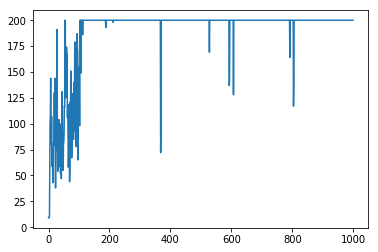

In [144]:
plt.plot(episode_rewards)

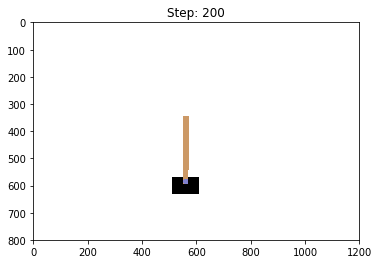

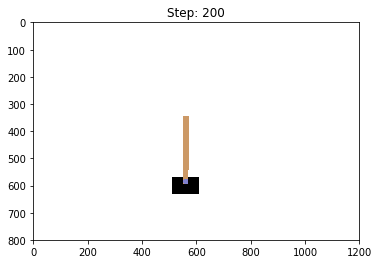

In [145]:
def show_state(env, step=0):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("Step: %d" % (step))
    
    plt.pause(0.001)  # pause for plots to update
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
        
done = False
state = env.reset()
step = 0
while not done:
    step += 1
    show_state(env, step)
    action = policy(env, w, state, 0.0)
    state, _, done, _ = env.step(action)